In [1]:
from pathlib import Path

base_dir = Path('../../local/out/elpp/')

In [2]:
import pandas as pd

df = pd.read_feather(base_dir / 'exp3.feather')
tmp = df.apply(lambda x:x['Axiom'], result_type='expand', axis=1)
df = pd.merge(df, tmp, left_index=True, right_index=True).rename(columns={0: 'Operator', 1: 'Subclass', 2: 'Superclass'})
df

,Complexity threshold j,Complexity threshold k,KB,Complexity,Axiom,Expected,Predicted,Raw predicted,Operator,Subclass,Superclass
0,2,2,0,9,"[0, 4, 53]",1,0,0.437073,0,4,53
1,2,2,0,3,"[0, 7, 53]",1,0,0.275827,0,7,53
2,2,2,0,8,"[0, 9, 0]",1,0,0.043837,0,9,0
3,2,2,0,10,"[0, 9, 46]",1,0,0.168075,0,9,46
4,2,2,0,7,"[0, 9, 53]",1,1,0.511046,0,9,53
...,...,...,...,...,...,...,...,...,...,...,...
5909147,20,20,17,22,"[0, 96, 66]",1,1,0.917326,0,96,66
5909148,20,20,17,23,"[0, 98, 5]",1,1,0.822247,0,98,5
5909149,20,20,17,21,"[0, 98, 10]",1,0,0.407074,0,98,10
5909150,20,20,17,22,"[0, 98, 48]",1,1,0.878611,0,98,48


## Reasoner training complexity (j) and embeddings training complexity (k) vs recall on the test set >k

In [3]:
df[['Complexity threshold j', 'Complexity threshold k', 'Predicted']].groupby(['Complexity threshold j', 'Complexity threshold k']).mean().reset_index().pivot(index='Complexity threshold j', columns='Complexity threshold k', values='Predicted')

Complexity threshold k,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Complexity threshold j,,,,,,,,,,,,,,,,,,,
2,0.476423,0.533810,0.561846,0.590169,0.610105,0.637744,0.665745,0.689513,0.701771,0.709332,0.732840,0.742829,0.742069,0.748757,0.753657,0.740738,0.743494,0.754662,0.756490
3,0.456762,0.510916,0.545101,0.569811,0.590048,0.616460,0.644054,0.668437,0.683257,0.690525,0.710934,0.720629,0.717913,0.725644,0.729069,0.718676,0.717207,0.728759,0.727273
4,0.441014,0.497115,0.526725,0.558640,0.579331,0.605318,0.634022,0.657256,0.667916,0.682978,0.700417,0.712770,0.713371,0.716062,0.718721,0.709835,0.710568,0.721227,0.715873
5,0.447109,0.500162,0.526341,0.553724,0.581169,0.608840,0.633588,0.659996,0.671607,0.684415,0.702471,0.714342,0.715918,0.718037,0.718410,0.710593,0.704195,0.717461,0.715107
6,0.423754,0.479622,0.511755,0.542056,0.568002,0.591076,0.621712,0.643895,0.663821,0.672616,0.694878,0.700393,0.705526,0.709260,0.714052,0.700152,0.700566,0.712226,0.709551
7,0.410409,0.466328,0.490644,0.524777,0.544425,0.571053,0.599154,0.620081,0.634927,0.649197,0.670110,0.682711,0.686670,0.689731,0.689698,0.680280,0.676491,0.686691,0.687518
8,0.397420,0.449850,0.482775,0.513555,0.539015,0.565062,0.592213,0.616167,0.631294,0.642130,0.667994,0.674591,0.677655,0.682563,0.685419,0.674385,0.672951,0.684211,0.680046
9,0.397687,0.452527,0.484311,0.516187,0.536310,0.561488,0.587387,0.613875,0.628352,0.643747,0.661771,0.673805,0.677311,0.678540,0.676704,0.667649,0.658878,0.675393,0.668646
10,0.385098,0.439511,0.474283,0.499156,0.524419,0.545354,0.574427,0.605098,0.619701,0.629372,0.653432,0.666863,0.668708,0.668812,0.668378,0.659566,0.654983,0.666850,0.661941


## Reasoner training complexity (j) and embeddings training complexity (k) vs recall on the test set >20


In [4]:
summary = df.pivot(index=['KB', 'Operator', 'Subclass', 'Superclass'], columns=['Complexity threshold k', 'Complexity threshold j'], values='Predicted').dropna().mean(axis=0).reset_index().pivot(index='Complexity threshold j', columns='Complexity threshold k', values=0)
summary

Complexity threshold k,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Complexity threshold j,,,,,,,,,,,,,,,,,,,
2,0.495162,0.543347,0.558483,0.572852,0.585497,0.613469,0.636747,0.649104,0.653128,0.657534,0.677843,0.691733,0.695661,0.714149,0.724016,0.719801,0.730147,0.747581,0.756490
3,0.462496,0.504454,0.528020,0.541527,0.555130,0.580994,0.605709,0.618929,0.627072,0.631382,0.649487,0.662037,0.664527,0.685027,0.691733,0.692882,0.700642,0.720471,0.727273
4,0.441517,0.485200,0.509436,0.530319,0.542293,0.570936,0.591149,0.604177,0.612894,0.623144,0.636555,0.651403,0.657917,0.671903,0.680142,0.683399,0.694798,0.712712,0.715873
5,0.458569,0.497270,0.518632,0.530798,0.550053,0.577163,0.592873,0.607434,0.613948,0.621803,0.635980,0.651020,0.658492,0.670467,0.679567,0.683590,0.687231,0.708305,0.715107
6,0.430884,0.476866,0.502251,0.517770,0.536162,0.557525,0.580036,0.590286,0.604081,0.609829,0.630137,0.636555,0.650637,0.662132,0.672766,0.672478,0.683016,0.702845,0.709551
7,0.413162,0.453875,0.468915,0.492672,0.501006,0.527733,0.549765,0.561548,0.569212,0.577258,0.593639,0.610116,0.618833,0.635406,0.642686,0.648530,0.657247,0.676118,0.687518
8,0.400421,0.437973,0.461155,0.479356,0.499761,0.527062,0.544497,0.557046,0.567200,0.574289,0.591819,0.605709,0.612511,0.631861,0.639142,0.642303,0.653702,0.673340,0.680046
9,0.396590,0.434908,0.458473,0.476291,0.492097,0.517004,0.537695,0.550915,0.558004,0.570265,0.581473,0.600057,0.610595,0.622569,0.626497,0.633969,0.638184,0.664144,0.668646
10,0.388351,0.427723,0.450714,0.463933,0.485774,0.508286,0.529265,0.542868,0.553980,0.559824,0.574193,0.592873,0.600920,0.615193,0.618450,0.624868,0.633681,0.655427,0.661941


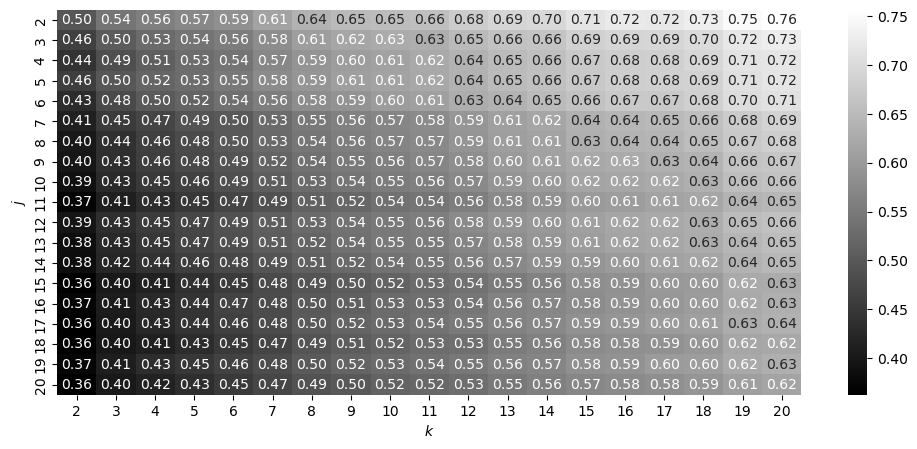

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.heatmap(summary, annot=True, fmt=".2f", cmap='gist_gray')
ax.set_xlabel('$k$')
ax.set_ylabel('$j$')
plt.savefig(base_dir / 'exp3.pdf', dpi=300)

# KB = dataset, (j, k) = classifier

This results in $19^2\cdot (19^2-1)/2=64,980$ comparisons. Assuming family-wise error rate $0.05$ and the Bonferroni correction, the significance level would be $0.05/64980=7.69\cdot 10^{-7}$ and that clearly makes no sense whatsoever.


In [6]:
summary = df.pivot(index=['KB', 'Operator', 'Subclass', 'Superclass'], columns=['Complexity threshold j', 'Complexity threshold k'], values='Predicted').dropna().reset_index().drop(columns=['Operator', 'Subclass', 'Superclass']).groupby('KB').mean()
summary.columns = summary.columns.to_flat_index()
summary

/tmp/ipykernel_12269/433819153.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  summary = df.pivot(index=['KB', 'Operator', 'Subclass', 'Superclass'], columns=['Complexity threshold j', 'Complexity threshold k'], values='Predicted').dropna().reset_index().drop(columns=['Operator', 'Subclass', 'Superclass']).groupby('KB').mean()


,"(2, 2)","(2, 3)","(2, 4)","(2, 5)","(2, 6)","(2, 7)","(2, 8)","(2, 9)","(2, 10)","(2, 11)",...,"(20, 11)","(20, 12)","(20, 13)","(20, 14)","(20, 15)","(20, 16)","(20, 17)","(20, 18)","(20, 19)","(20, 20)"
KB,,,,,,,,,,,,,,,,,,,,,
0,0.400000,0.600000,0.600000,0.800000,0.600000,0.600000,0.800000,0.600000,0.600000,0.600000,...,0.800000,0.800000,0.800000,1.000000,1.000000,1.000000,0.800000,0.800000,1.000000,1.000000
1,0.370690,0.301724,0.387931,0.474138,0.456897,0.525862,0.577586,0.534483,0.568966,0.612069,...,0.594828,0.646552,0.577586,0.620690,0.603448,0.655172,0.724138,0.741379,0.732759,0.775862
2,0.312817,0.388125,0.381608,0.396090,0.404055,0.454019,0.470673,0.459088,0.472846,0.490949,...,0.493121,0.503259,0.514120,0.539464,0.533671,0.553222,0.546705,0.597393,0.573497,0.607531
3,0.287273,0.385455,0.352727,0.381818,0.407273,0.429091,0.421818,0.447273,0.385455,0.443636,...,0.450909,0.476364,0.549091,0.545455,0.574545,0.603636,0.596364,0.621818,0.636364,0.665455
4,0.482759,0.517241,0.482759,0.603448,0.637931,0.655172,0.724138,0.706897,0.672414,0.672414,...,0.758621,0.724138,0.827586,0.844828,0.810345,0.810345,0.758621,0.793103,0.810345,0.775862
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.157895,0.210526,0.210526,0.263158,0.157895,0.210526,0.263158,0.368421,0.368421,0.421053,...,0.473684,0.473684,0.631579,0.578947,0.684211,0.789474,0.684211,0.736842,0.789474,0.789474
8,0.350000,0.550000,0.600000,0.750000,0.400000,0.600000,0.750000,0.800000,0.650000,0.800000,...,0.900000,0.850000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.950000
9,0.508850,0.548673,0.547198,0.572271,0.581121,0.672566,0.735988,0.735988,0.749263,0.731563,...,0.616519,0.606195,0.626844,0.654867,0.625369,0.663717,0.685841,0.666667,0.668142,0.693215


In [7]:
from scipy.stats import friedmanchisquare

friedmanchisquare(*summary.to_numpy())


FriedmanchisquareResult(statistic=3437.2324935683746, pvalue=0.0)

In [9]:
import scikit_posthocs as sp

sp.posthoc_nemenyi_friedman(summary, melted=False) #.to_numpy())

,"(2, 2)","(2, 3)","(2, 4)","(2, 5)","(2, 6)","(2, 7)","(2, 8)","(2, 9)","(2, 10)","(2, 11)",...,"(20, 11)","(20, 12)","(20, 13)","(20, 14)","(20, 15)","(20, 16)","(20, 17)","(20, 18)","(20, 19)","(20, 20)"
"(2, 2)",1.000000,0.900000,0.900000,0.9000,0.900000,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.055793,0.034633,0.001000,0.001000,0.001023,0.001089,0.001000,0.001000
"(2, 3)",0.900000,1.000000,0.900000,0.9000,0.900000,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.900000,0.900000,0.223402,0.148079,0.254555,0.264752,0.011146,0.001000
"(2, 4)",0.900000,0.900000,1.000000,0.9000,0.900000,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.900000,0.900000,0.093423,0.060982,0.111012,0.116475,0.003288,0.001000
"(2, 5)",0.900000,0.900000,0.900000,1.0000,0.900000,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.086800
"(2, 6)",0.900000,0.900000,0.900000,0.9000,1.000000,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.084042,0.005252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(20, 16)",0.001000,0.148079,0.060982,0.9000,0.900000,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000
"(20, 17)",0.001023,0.254555,0.111012,0.9000,0.900000,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000
"(20, 18)",0.001089,0.264752,0.116475,0.9000,0.900000,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000
"(20, 19)",0.001000,0.011146,0.003288,0.9000,0.084042,0.900000,0.9,0.9,0.9,0.9,...,0.9,0.9,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000
